In [1]:
### Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Dell\AppData\Local\Temp\ipykernel_14536\933189958.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/final_full_dataset_Descriptives.csv")
df.head()

,Hospital,Main Unit,Age,Gender,Ethnicity,Highest Educational Level,Marital Status,Have Children?,No. of Children have,Age of the youngest child,...,Cleanliness,Safety,Availability and accessibility,Sufficient rest areas,BMI,P/N Ratio,CS_Score,BO_Score,STS_Score,Weight
0,DMH,Inward,29,Female,Sinhala,Diploma in Nursing,Married,Yes,1,Less than 1 yr,...,High,High,High,High,17.777778,20.000000,42,35,29,21.702
1,DMH,Inward,25,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,Very high,Very high,Very high,Very high,25.299376,2.058824,48,42,40,21.702
2,DMH,Inward,28,Female,Sinhala,BSc. Nursing,Married,No,999,Not relevant,...,High,High,Average,Average,22.313278,2.000000,32,33,35,21.702
3,DMH,Inward,43,Female,Sinhala,BSc. (Hons) in Nursing,Married,Yes,3,4 - 7 yrs,...,High,High,High,Low,25.631168,1.750000,45,39,33,21.702
4,DMH,Inward,28,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,High,High,High,High,22.666667,1.764706,42,44,37,21.702


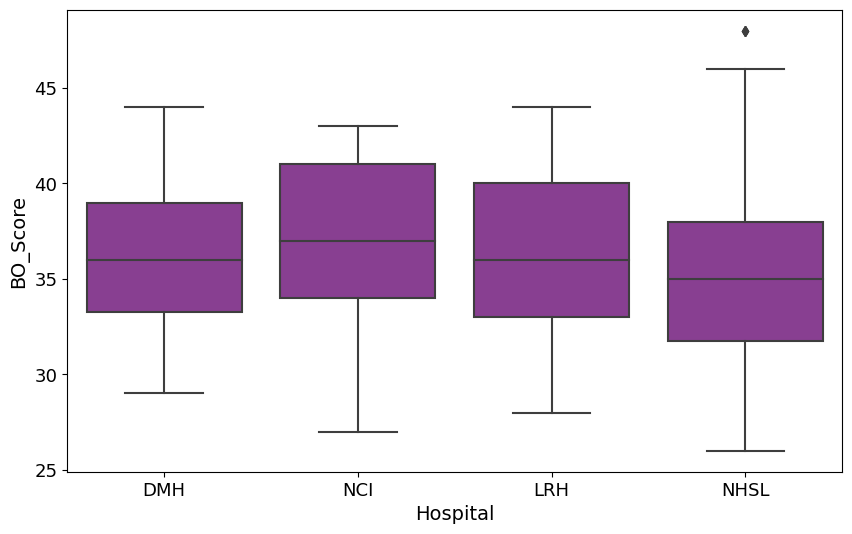

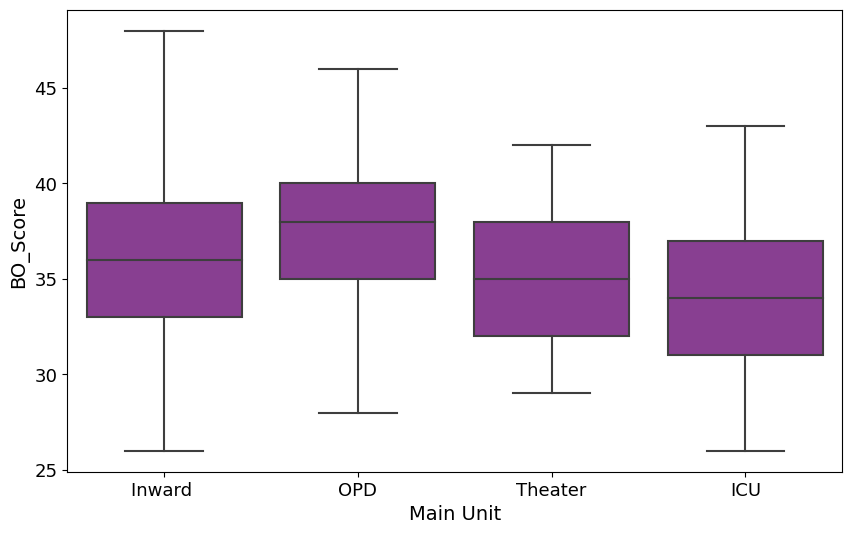

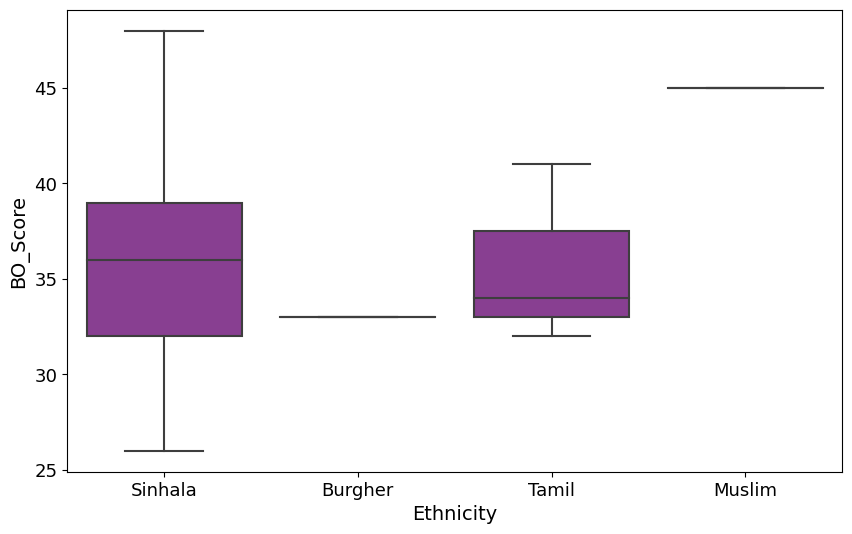

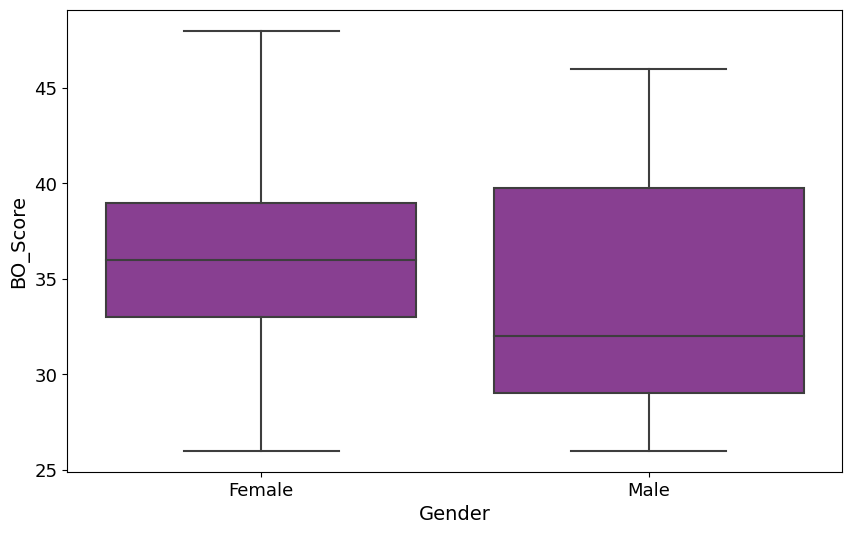

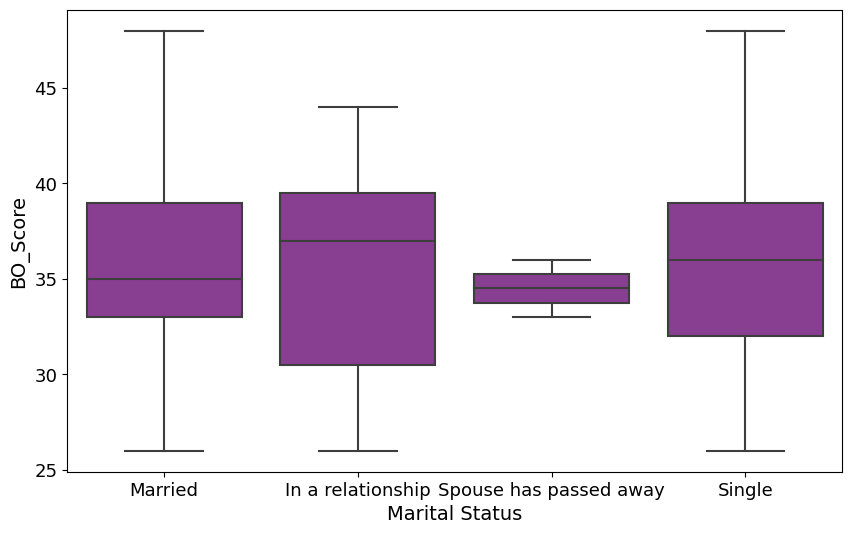

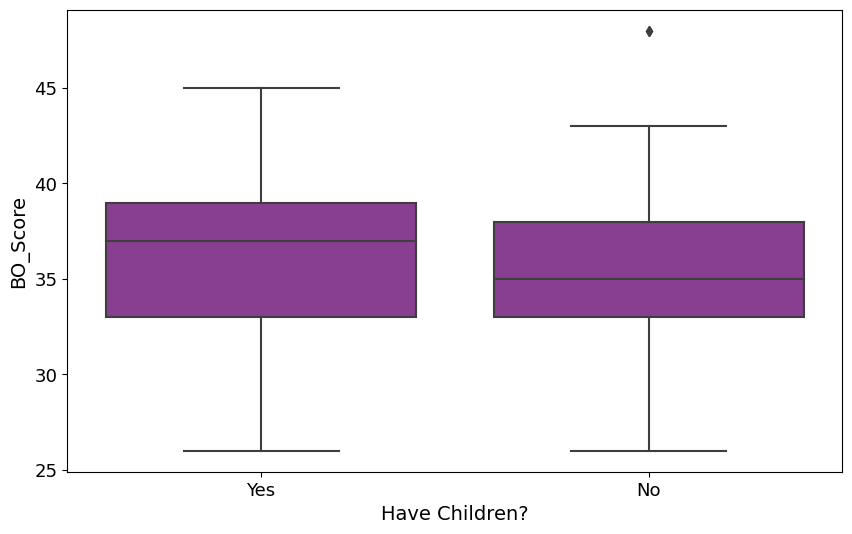

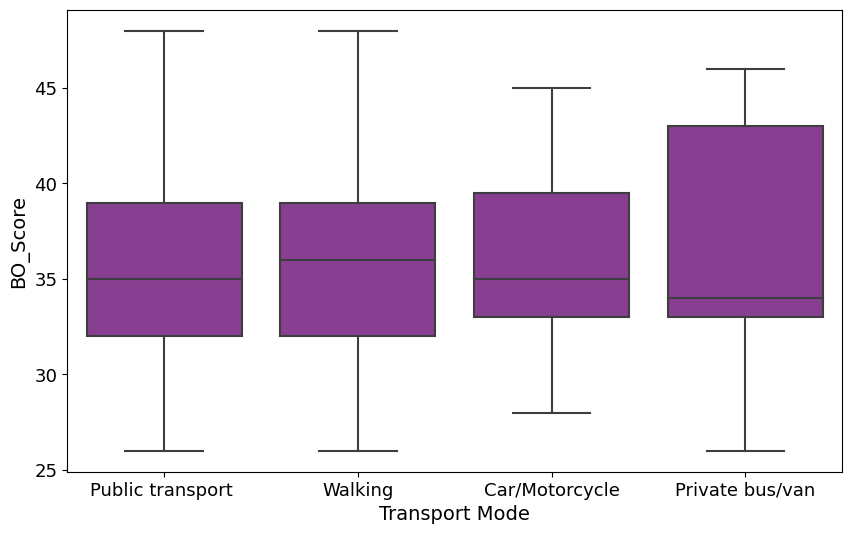

In [3]:
# BO with nominal variables

nominal_variables = ['Hospital', 'Main Unit', 'Ethnicity','Gender','Marital Status','Have Children?','Transport Mode']

# Loop through nominal variables and create boxplots
for nominal_var in nominal_variables:
    plt.figure(figsize=(10, 6))
    
    custom_palette = {'#93329E'}
    
    # Exclude 'Not relevant' category for 'Have Children?' variable
    if nominal_var == 'Have Children?':
        sns.boxplot(x=nominal_var, y='BO_Score', data=df[df[nominal_var] != 'Not relevant'], palette=custom_palette)
    else:
        sns.boxplot(x=nominal_var, y='BO_Score', data=df, palette=custom_palette)
    
    plt.xlabel(f'{nominal_var}', fontsize=14)  # Increase X-axis label font size
    plt.ylabel('BO_Score', fontsize=14)  # Increase Y-axis label font size
    plt.xticks(fontsize=13)  # Increase font size of category labels on X-axis
    plt.yticks(fontsize=13) 
    plt.show()
    
    

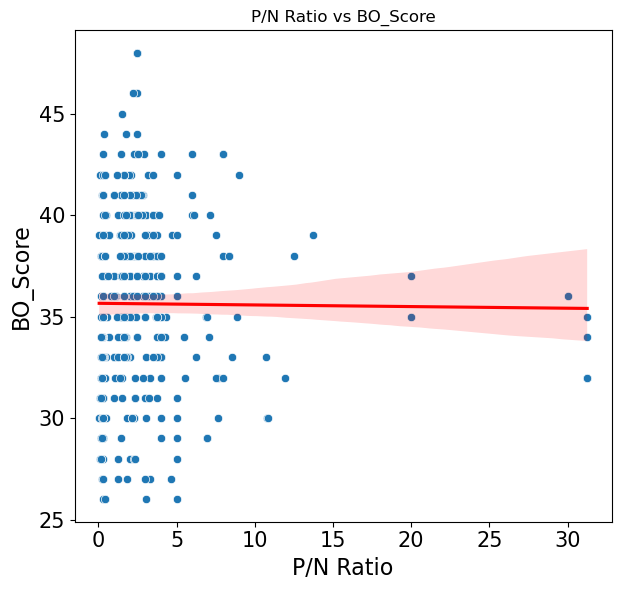

In [4]:
# BO with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for P/N Ratio vs CS_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='BO_Score', data=df)
sns.regplot(x='P/N Ratio', y='BO_Score', data=df, scatter=False, color='red')
plt.title('P/N Ratio vs BO_Score')

plt.xlabel(f'P/N Ratio', fontsize=16)
plt.ylabel('BO_Score', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

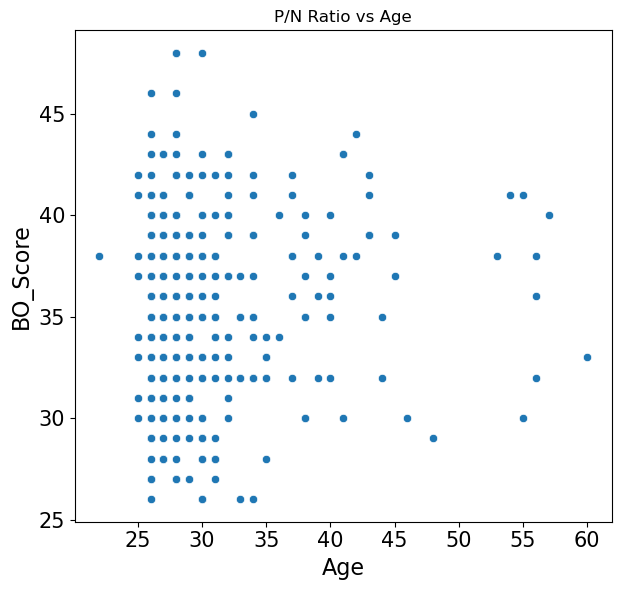

In [5]:
# BO with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for P/N Ratio vs CS_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='BO_Score', data=df)
plt.title('P/N Ratio vs Age')

plt.xlabel(f'Age', fontsize=16)
plt.ylabel('BO_Score', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

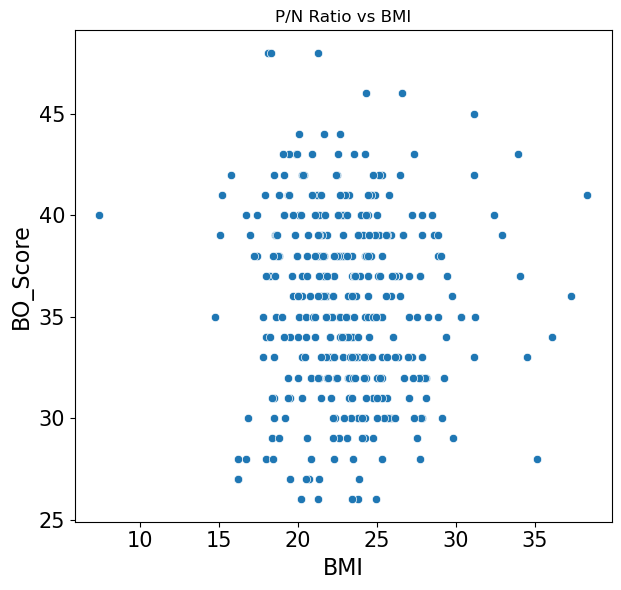

In [6]:
# BO with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for P/N Ratio vs CS_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='BMI', y='BO_Score', data=df)
plt.title('P/N Ratio vs BMI')

plt.xlabel(f'BMI', fontsize=16)
plt.ylabel('BO_Score', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

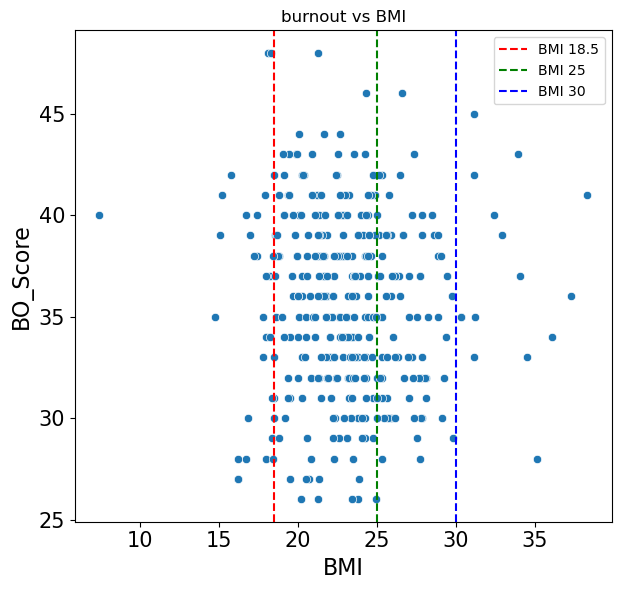

In [7]:
# BO with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for P/N Ratio vs CS_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='BMI', y='BO_Score', data=df)
plt.title('burnout vs BMI')

plt.xlabel(f'BMI', fontsize=16)
plt.ylabel('BO_Score', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Add vertical cutoff lines
plt.axvline(x=18.5, color='red', linestyle='--', label='BMI 18.5')
plt.axvline(x=25, color='green', linestyle='--', label='BMI 25')
plt.axvline(x=30, color='blue', linestyle='--', label='BMI 30')

plt.legend()  # Show the legend
plt.tight_layout()
plt.show()

In [8]:
BMI = df['BMI']

# Initialize counters for each category
underweight_count = 0
normal_count = 0
overweight_count = 0
obesity_count = 0

# Iterate through each BMI value
for value in BMI:
    if value < 18.5:
        underweight_count += 1
    elif 18.5 <= value < 25:
        normal_count += 1
    elif 25 <= value < 30:
        overweight_count += 1
    else:
        obesity_count += 1

# Print the counts
print(f"Underweight: {underweight_count} individuals")
print(f"Normal: {normal_count} individuals")
print(f"Overweight: {overweight_count} individuals")
print(f"Obesity: {obesity_count} individuals")

Underweight: 32 individuals
Normal: 240 individuals
Overweight: 81 individuals
Obesity: 15 individuals


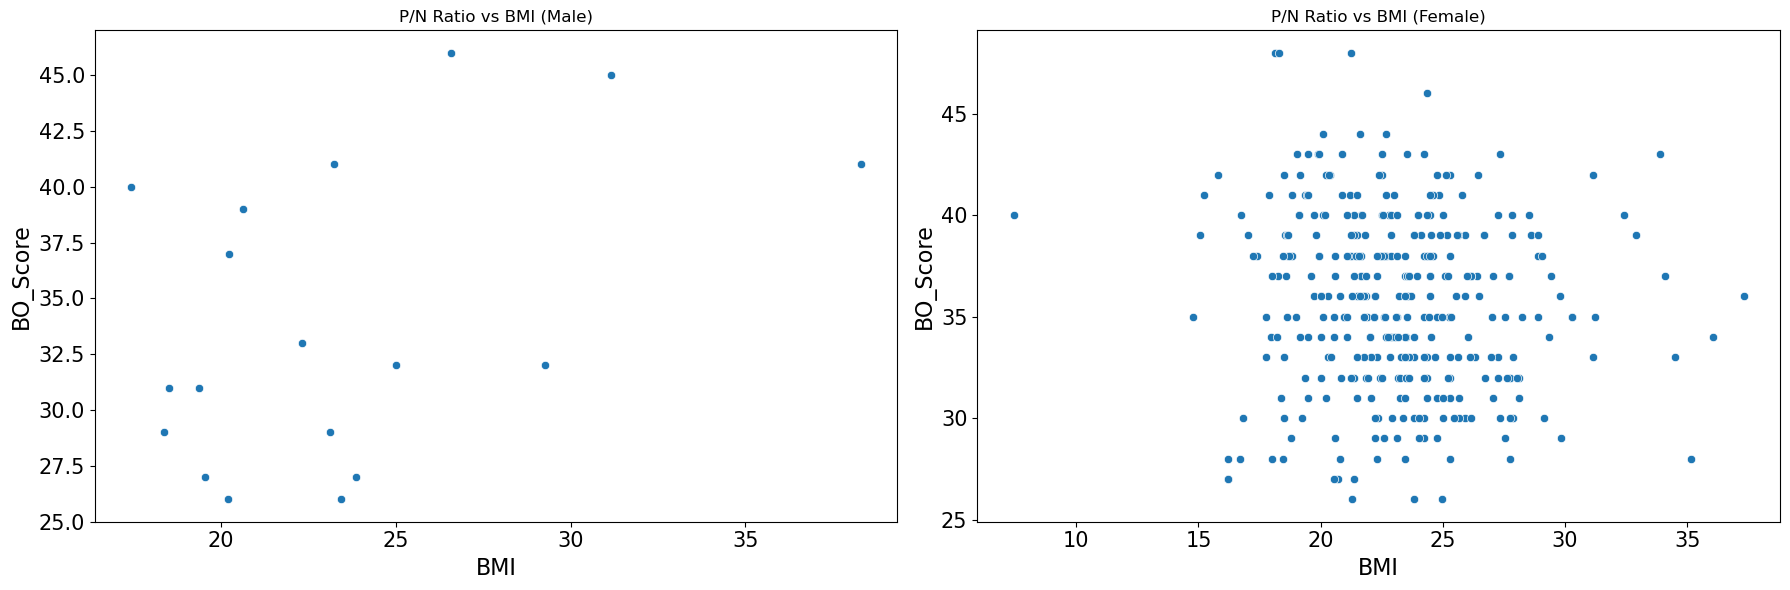

In [9]:
# BO with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for P/N Ratio vs CS_Score for males
plt.subplot(1, 2, 1)  # Adjust the subplot parameters
sns.scatterplot(x='BMI', y='BO_Score', data=df[df['Gender'] == 'Male'])
plt.title('P/N Ratio vs BMI (Male)')

plt.xlabel(f'BMI', fontsize=16)
plt.ylabel('BO_Score', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Scatter plot for P/N Ratio vs CS_Score for females
plt.subplot(1, 2, 2)  # Adjust the subplot parameters
sns.scatterplot(x='BMI', y='BO_Score', data=df[df['Gender'] == 'Female'])
plt.title('P/N Ratio vs BMI (Female)')

plt.xlabel(f'BMI', fontsize=16)
plt.ylabel('BO_Score', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

In [10]:
category_counts = df['Main Unit'].value_counts()
print(category_counts)


Main Unit
Inward     172
ICU        104
OPD         61
Theater     31
Name: count, dtype: int64


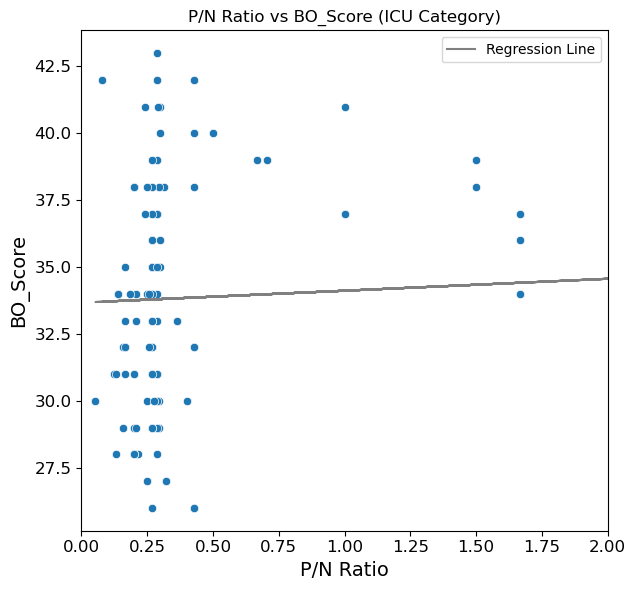

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming you have already loaded your data and assigned it to the variable 'df'

# Filter data for the 'OPD' category in the 'Main Unit' variable
ICU_df = df[df['Main Unit'] == 'ICU']

# Scatter plot for P/N Ratio vs BO_Score (using the filtered data)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='BO_Score', data=ICU_df)

# Set x-axis range from 0 to 2
plt.xlim(0, 2)

# Increase font size for x and y labels
plt.xlabel('P/N Ratio', fontsize=14)
plt.ylabel('BO_Score', fontsize=14)

# Increase font size for x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Calculate the regression line
m, b = np.polyfit(ICU_df['P/N Ratio'], ICU_df['BO_Score'], 1)

# Plot the regression line
plt.plot(ICU_df['P/N Ratio'], m * ICU_df['P/N Ratio'] + b, color='grey', label='Regression Line')

plt.title('P/N Ratio vs BO_Score (ICU Category)')
plt.legend()

plt.tight_layout()
plt.show()

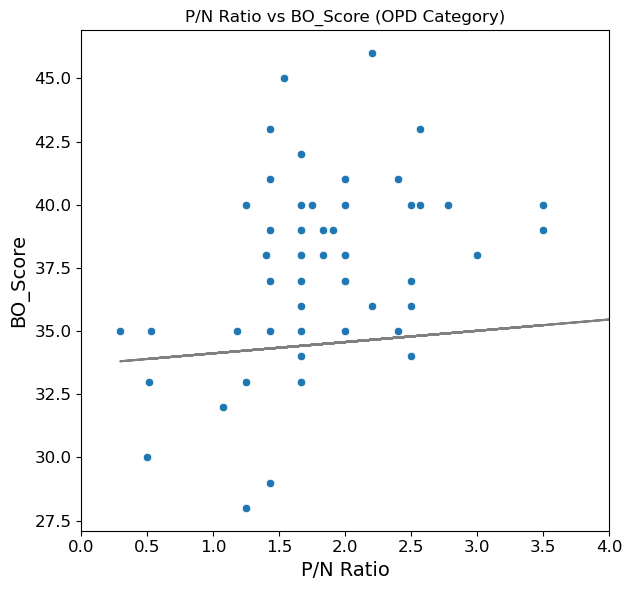

In [12]:
# Assuming you have already loaded your data and assigned it to the variable 'df'

# Filter data for the 'OPD' category in the 'Main Unit' variable
OPD_df = df[df['Main Unit'] == 'OPD']

# Scatter plot for P/N Ratio vs BO_Score (using the filtered data)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='BO_Score', data=OPD_df)
plt.title('P/N Ratio vs BO_Score (OPD Category)')

# Plot the regression line
plt.plot(OPD_df['P/N Ratio'], m * OPD_df['P/N Ratio'] + b, color='grey', label='Regression Line')

# Set x-axis range from 0 to 2
plt.xlim(0, 4)

# Increase font size for x and y labels
plt.xlabel('P/N Ratio', fontsize=14)  # Modify the fontsize as needed
plt.ylabel('BO_Score', fontsize=14)   # Modify the fontsize as needed

# Increase font size for x and y tick labels
plt.xticks(fontsize=12)  # Modify the fontsize as needed
plt.yticks(fontsize=12)  # Modify the fontsize as needed

plt.tight_layout()
plt.show()

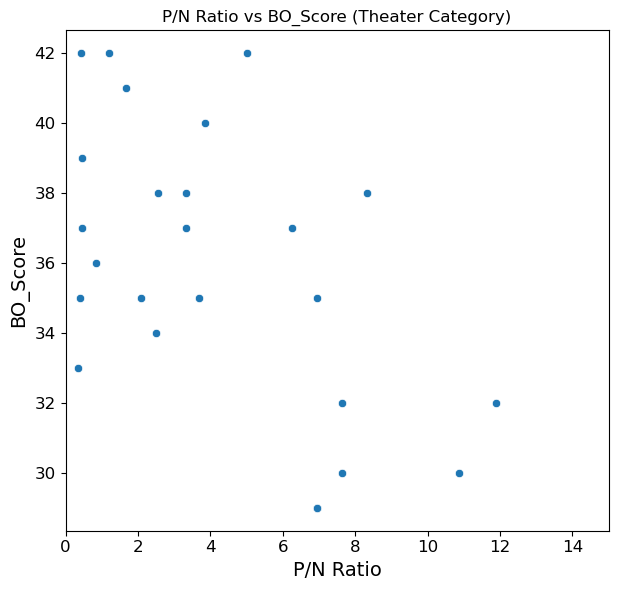

In [13]:
# Assuming you have already loaded your data and assigned it to the variable 'df'

# Filter data for the 'OPD' category in the 'Main Unit' variable
Theater_df = df[df['Main Unit'] == 'Theater']

# Scatter plot for P/N Ratio vs BO_Score (using the filtered data)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='BO_Score', data=Theater_df)

# Increase font size for x and y labels
plt.xlabel('P/N Ratio', fontsize=14)  # Modify the fontsize as needed
plt.ylabel('BO_Score', fontsize=14)   # Modify the fontsize as needed

# Increase font size for x and y tick labels
plt.xticks(fontsize=12)  # Modify the fontsize as needed
plt.yticks(fontsize=12)  # Modify the fontsize as needed
plt.title('P/N Ratio vs BO_Score (Theater Category)')

# Set x-axis range from 0 to 2
plt.xlim(0, 15)

plt.tight_layout()
plt.show()

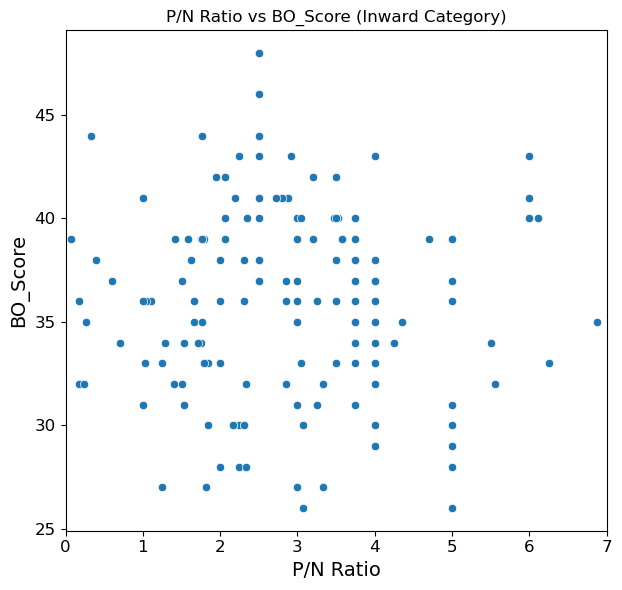

In [14]:
# Assuming you have already loaded your data and assigned it to the variable 'df'

# Filter data for the 'OPD' category in the 'Main Unit' variable
Inward_df = df[df['Main Unit'] == 'Inward ']

# Scatter plot for P/N Ratio vs BO_Score (using the filtered data)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='BO_Score', data=Inward_df)

# Increase font size for x and y labels
plt.xlabel('P/N Ratio', fontsize=14)  # Modify the fontsize as needed
plt.ylabel('BO_Score', fontsize=14)   # Modify the fontsize as needed

# Increase font size for x and y tick labels
plt.xticks(fontsize=12)  # Modify the fontsize as needed
plt.yticks(fontsize=12)  # Modify the fontsize as needed
plt.title('P/N Ratio vs BO_Score (Inward Category)')

# Set x-axis range from 0 to 2
plt.xlim(0, 7)

plt.tight_layout()
plt.show()

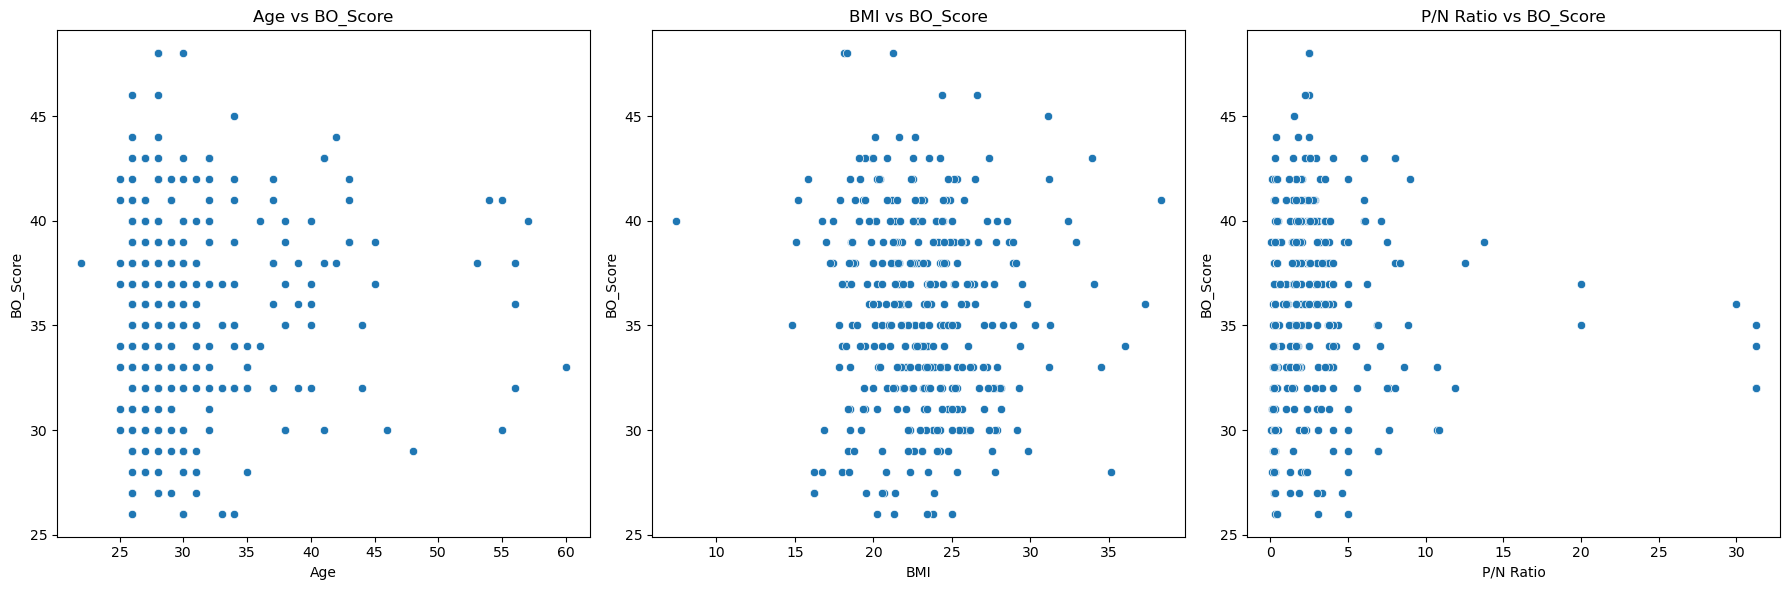

In [15]:
# BO with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for Age vs CS_Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='BO_Score', data=df)
plt.title('Age vs BO_Score')

# Scatter plot for BMI vs CS_Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='BMI', y='BO_Score', data=df)
plt.title('BMI vs BO_Score')

# Scatter plot for P/N Ratio vs CS_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='BO_Score', data=df)
plt.title('P/N Ratio vs BO_Score')

plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


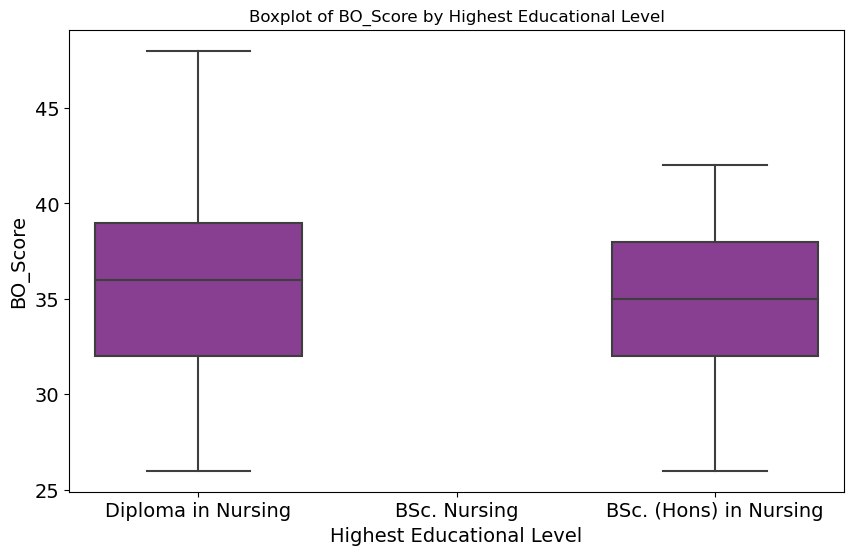

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


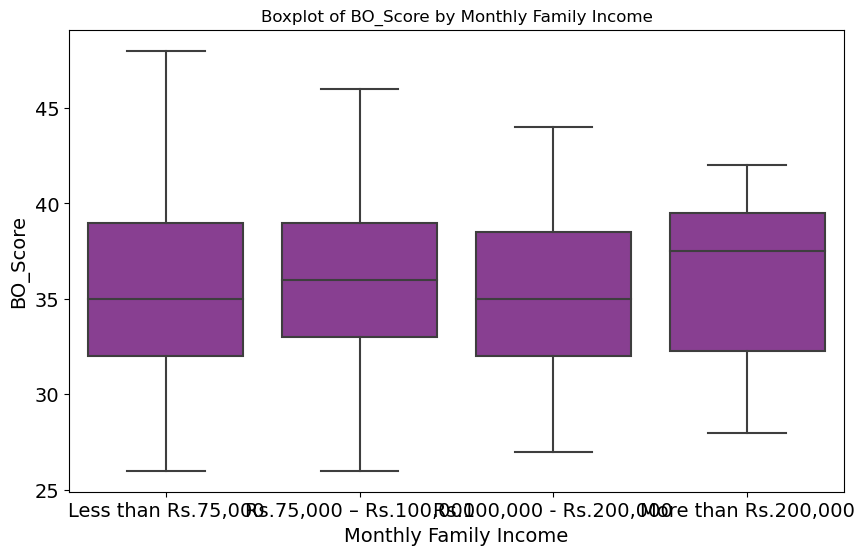

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


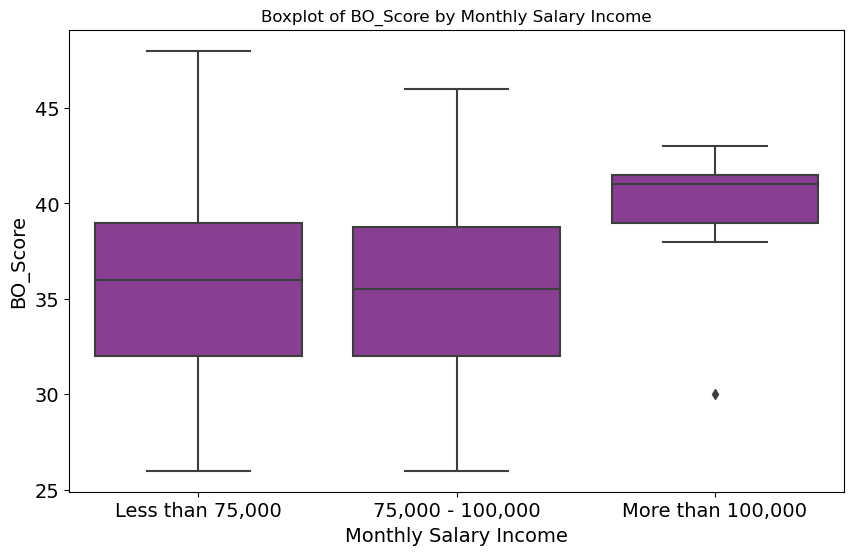

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


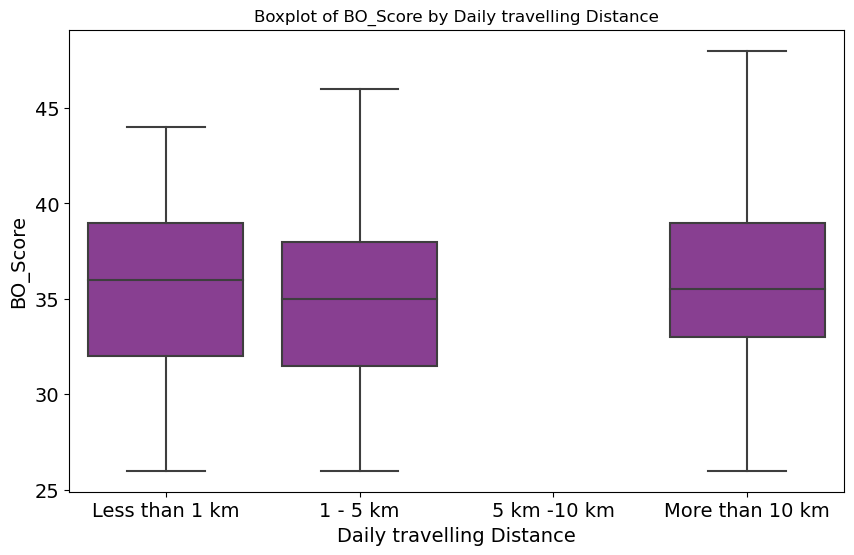

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


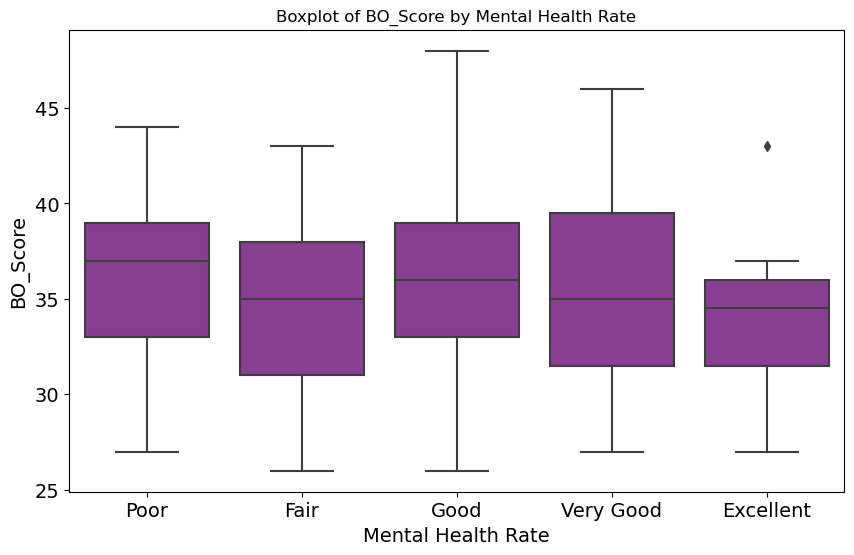

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


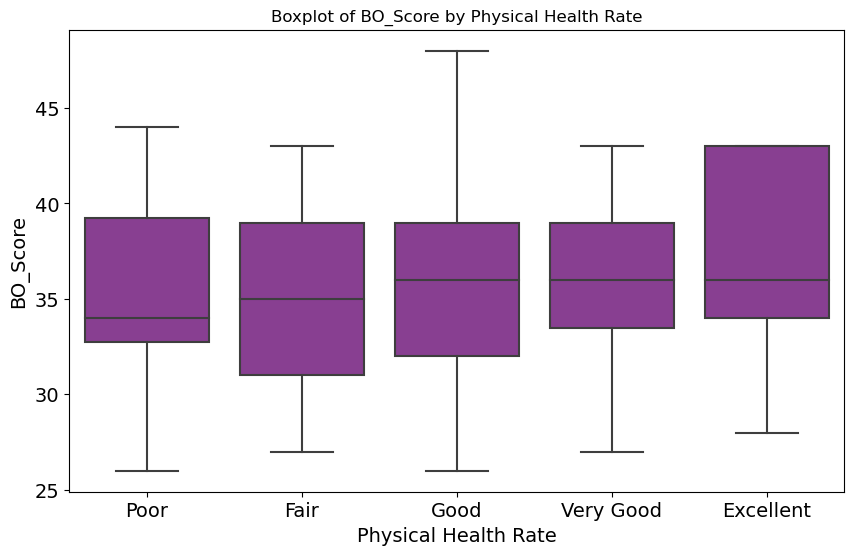

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


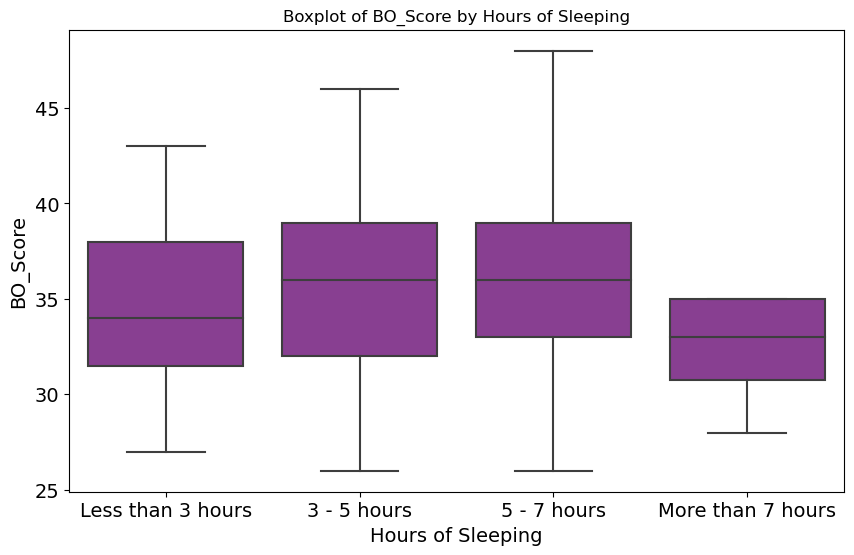

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


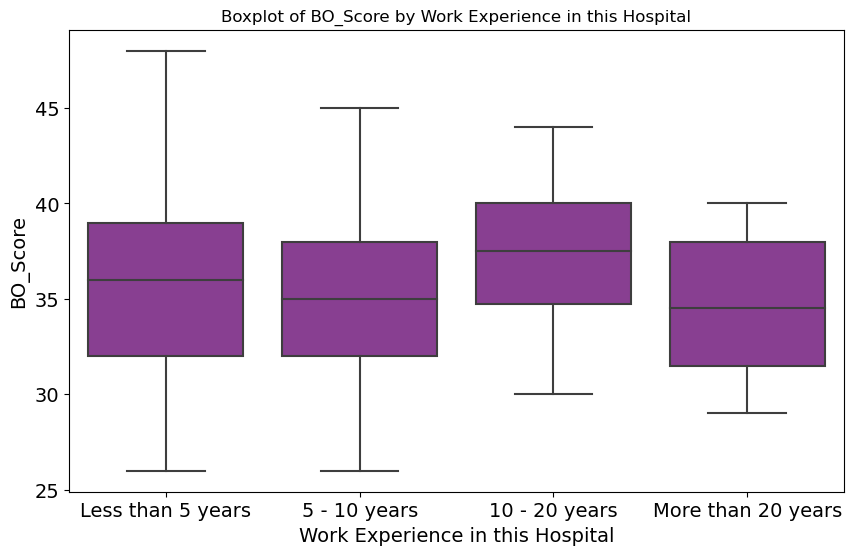

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


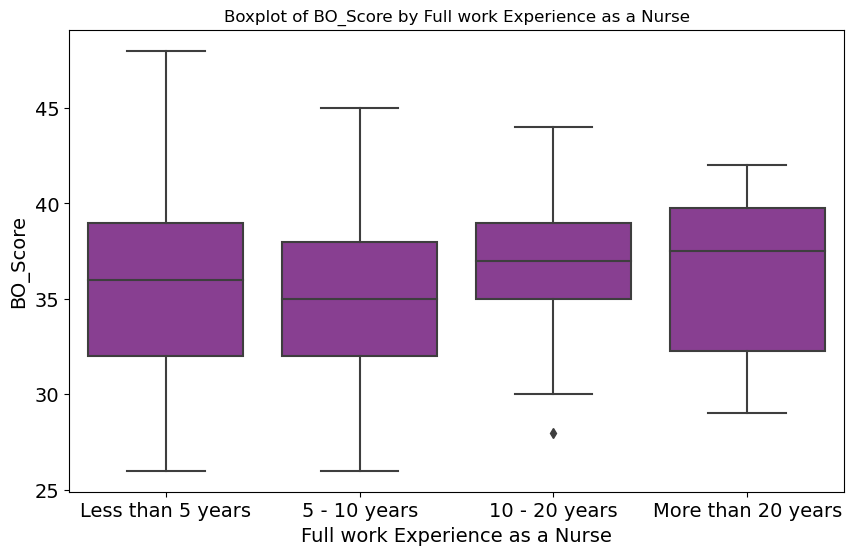

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


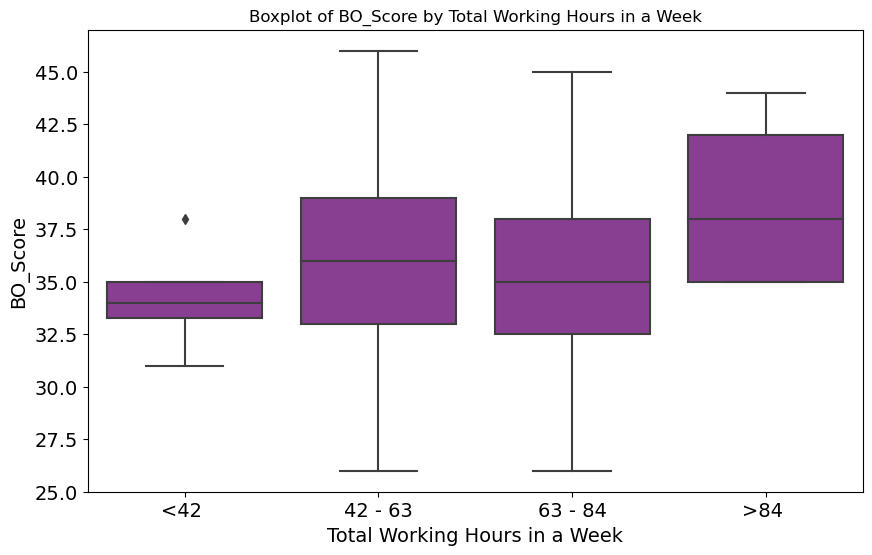

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


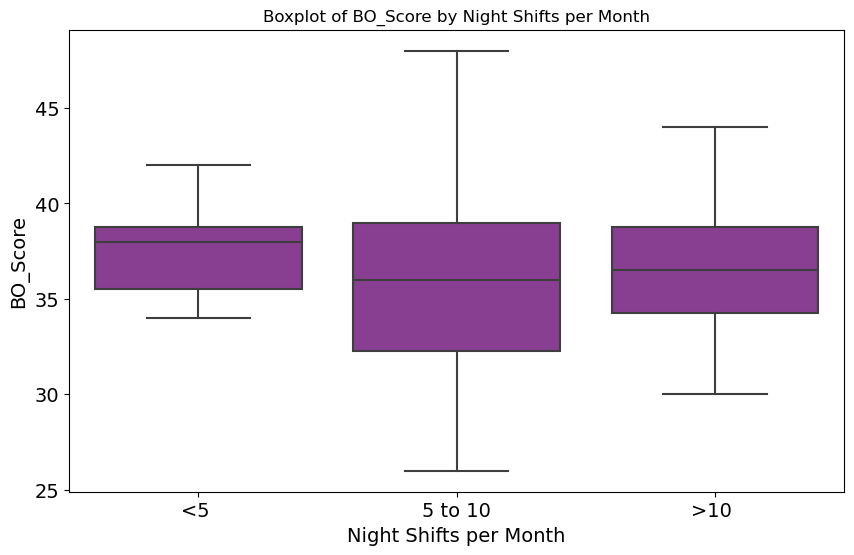

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


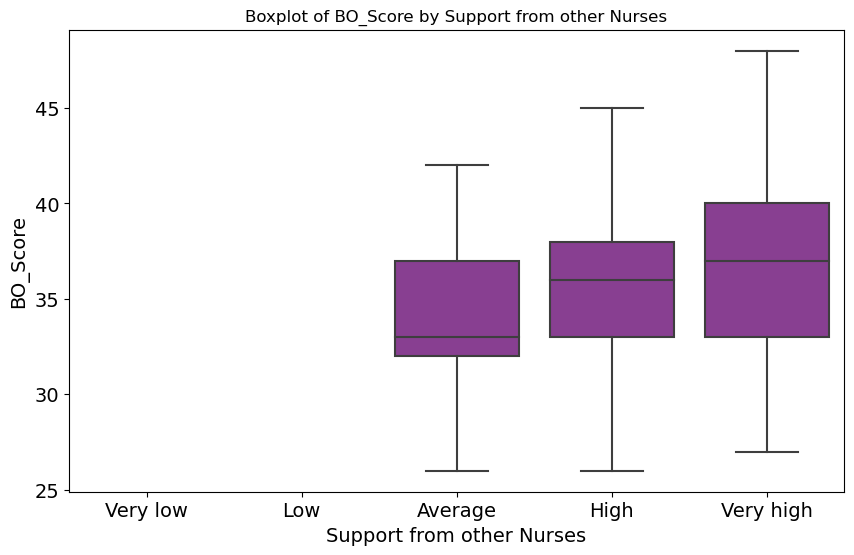

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


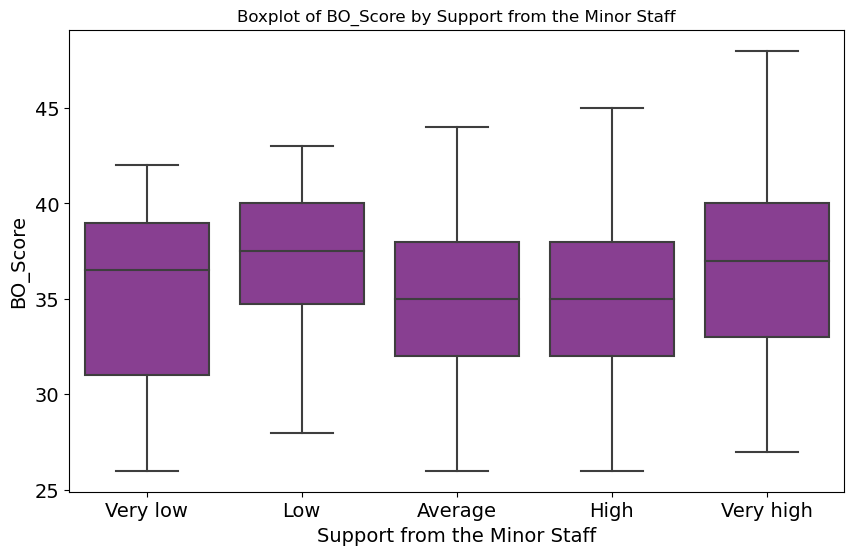

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


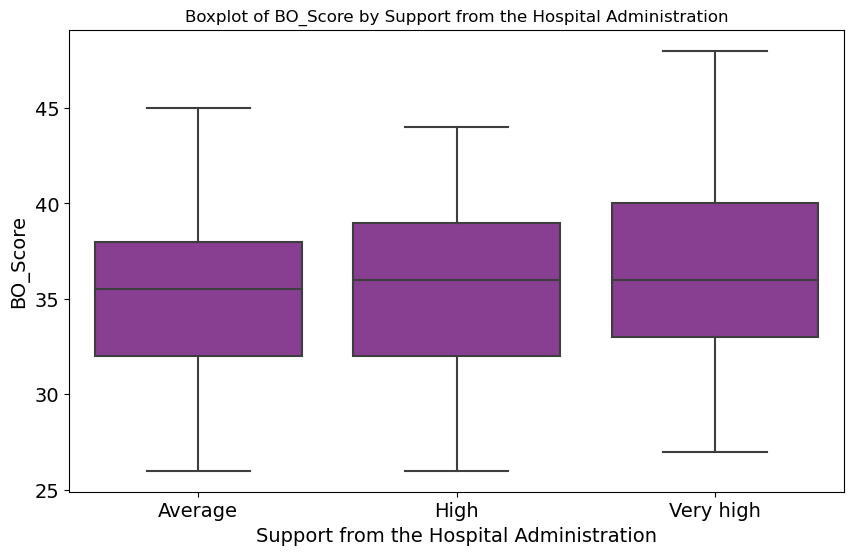

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


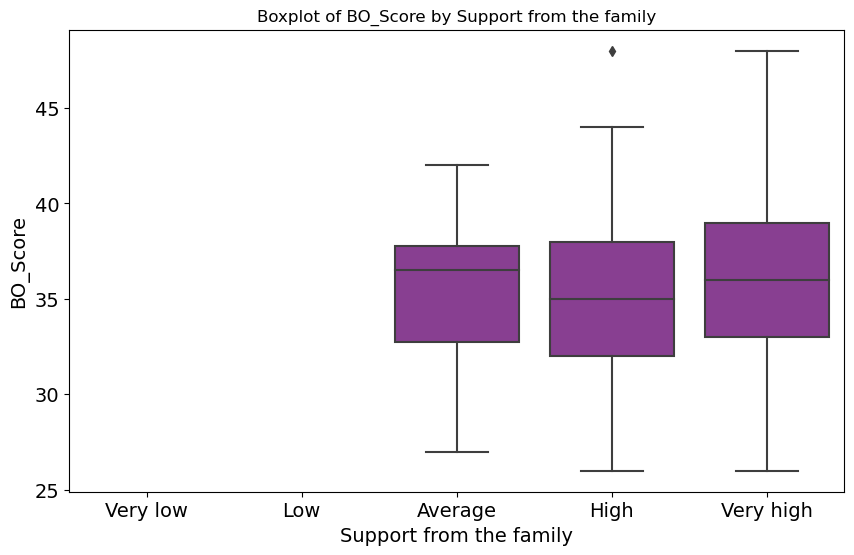

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


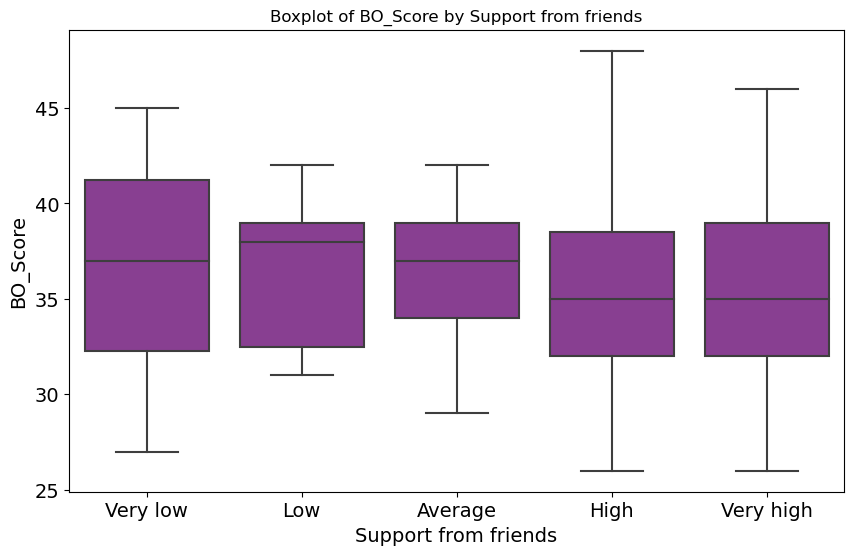

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


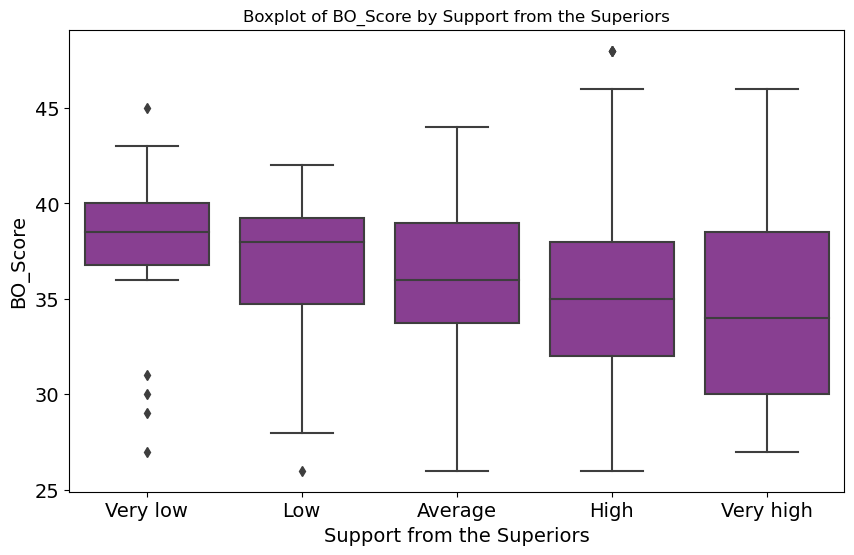

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


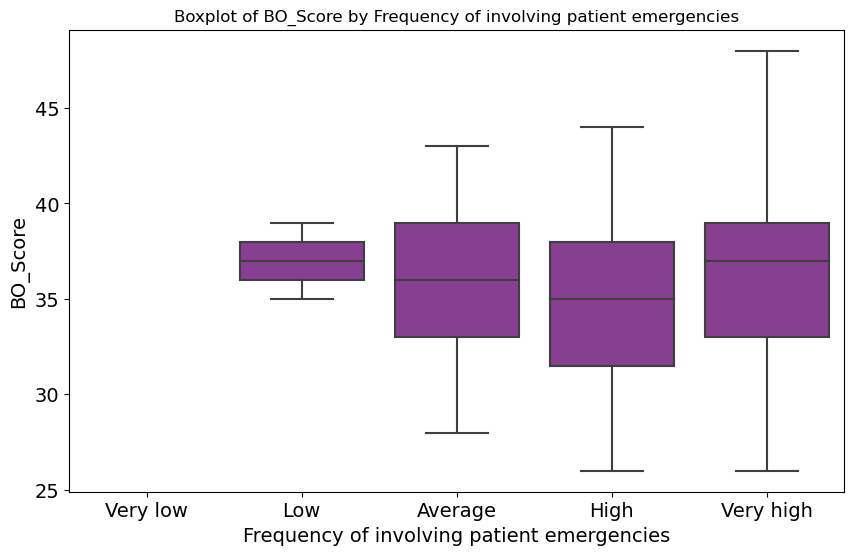

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


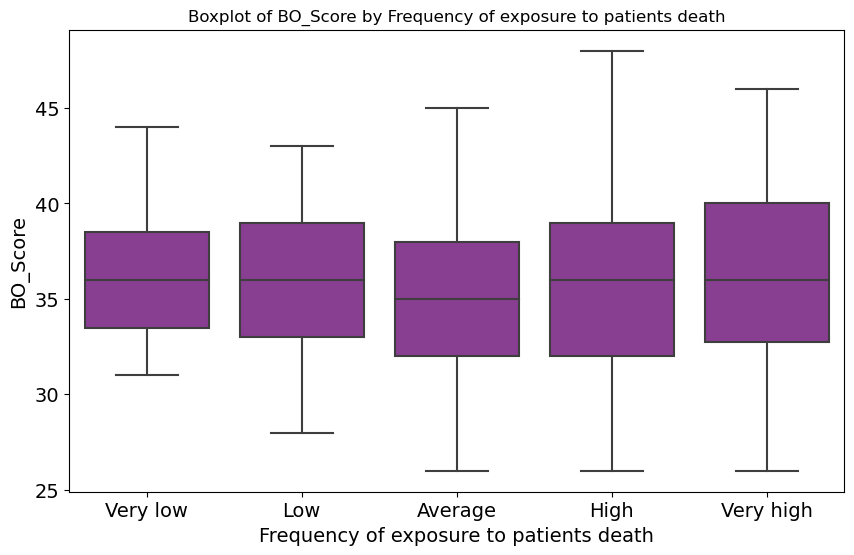

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


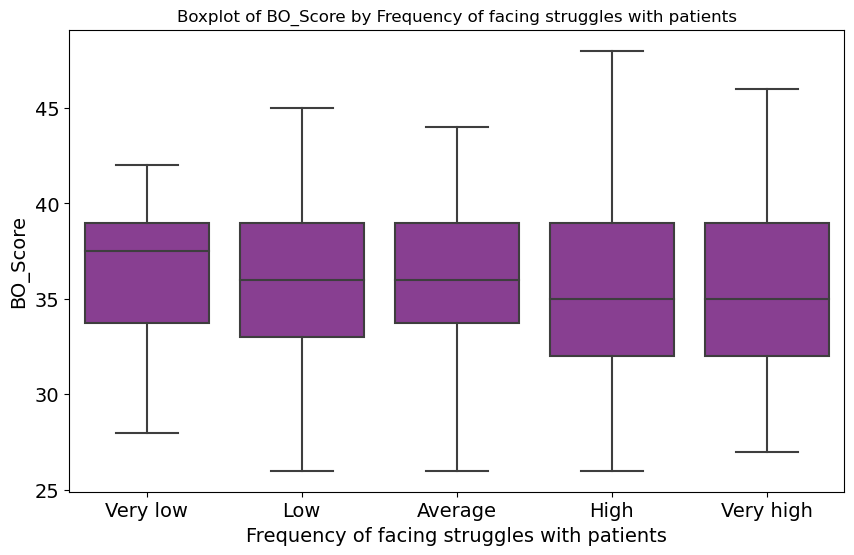

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


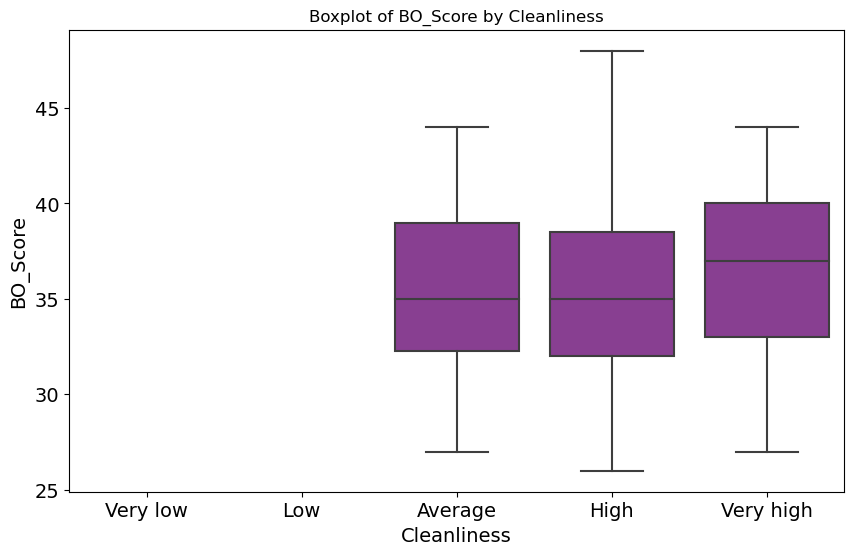

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


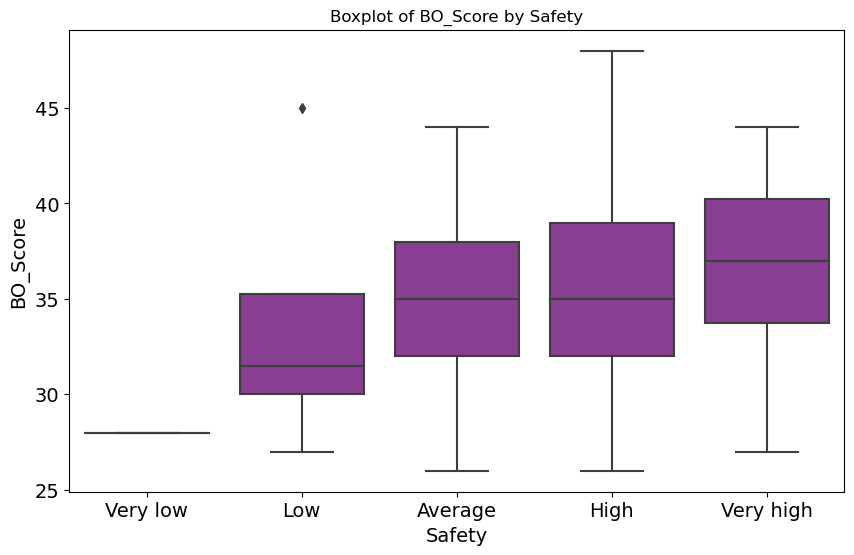

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


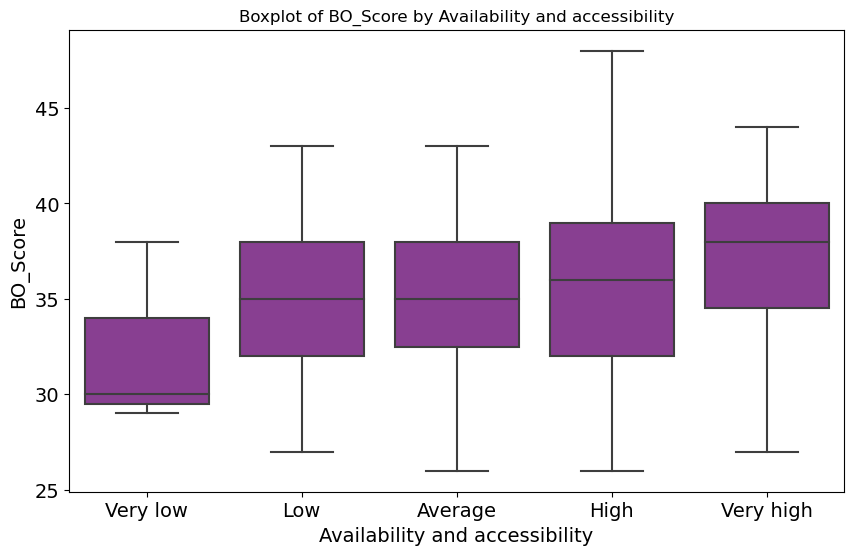

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


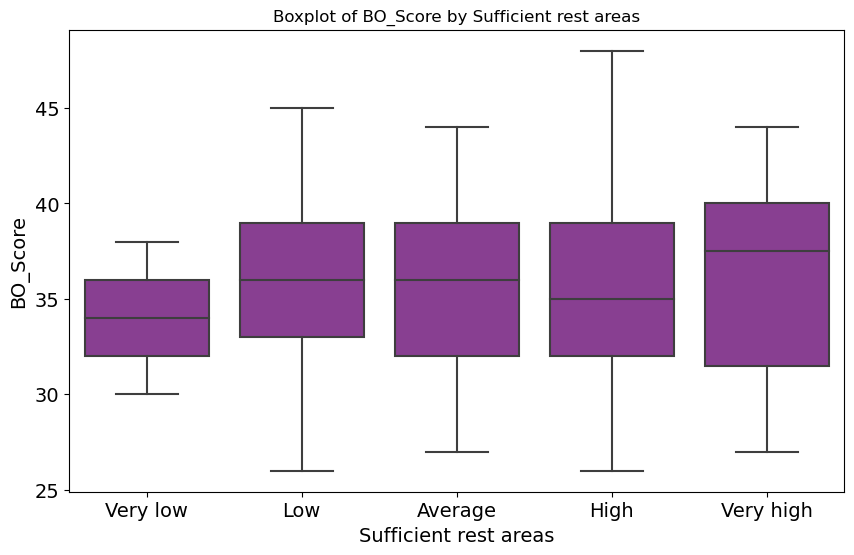

In [16]:
## BO with ordinal variables

ordinal_variables = ['Highest Educational Level','Monthly Family Income','Monthly Salary Income', 'Daily travelling Distance', 'Mental Health Rate','Physical Health Rate','Hours of Sleeping','Work Experience in this Hospital','Full work Experience as a Nurse','Total Working Hours in a Week','Night Shifts per Month','Support from other Nurses','Support from the Minor Staff','Support from the Hospital Administration','Support from the family','Support from friends','Support from the Superiors','Frequency of involving patient emergencies','Frequency of exposure to patients death','Frequency of facing struggles with patients','Cleanliness','Safety','Availability and accessibility','Sufficient rest areas']

ordinal_variables_order = {
    'Highest Educational Level': ['Diploma in Nursing', 'BSc. Nursing', 'BSc. (Hons) in Nursing'],
    'Monthly Family Income': ['Less than Rs.75,000', 'Rs.75,000 – Rs.100,000', 'Rs.100,000 - Rs.200,000','More than Rs.200,000'],
    'Monthly Salary Income': ['Less than 75,000', '75,000 - 100,000', 'More than 100,000'],
    'Daily travelling Distance': ['Less than 1 km', '1 - 5 km', '5 km -10 km','More than 10 km'],
    'Mental Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Physical Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Hours of Sleeping': ['Less than 3 hours','3 - 5 hours','5 - 7 hours','More than 7 hours'],
    'Work Experience in this Hospital': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Full work Experience as a Nurse': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Total Working Hours in a Week': ['<42 ','42 - 63','63 - 84','>84 '],
    'Night Shifts per Month': ['<5 ','5 to 10','>10 '],
    'Relationship with the Superiors': ['Very low','Low','Average','High','Very high'],
    'Support from other Nurses': ['Very low','Low','Average','High','Very high'],
    'Support from the Minor Staff': ['Very low','Low','Average','High','Very high'],
    'Support from the Hospital Administration': ['Average','High','Very high'],
    'Support from the family': ['Very low','Low','Average','High','Very high'],
    'Support from friends': ['Very low','Low','Average','High','Very high'],
    'Support from the Superiors': ['Very low','Low','Average','High','Very high'],
    'Frequency of involving patient emergencies': ['Very low','Low','Average','High','Very high'],
    'Frequency of exposure to patients death': ['Very low','Low','Average','High','Very high'],
    'Frequency of facing struggles with patients': ['Very low','Low','Average','High','Very high'],
    'Cleanliness': ['Very low','Low','Average','High','Very high'],
    'Safety': ['Very low','Low','Average','High','Very high'],
    'Availability and accessibility': ['Very low','Low','Average','High','Very high'],
    'Sufficient rest areas': ['Very low','Low','Average','High','Very high']
}

# Convert ordinal variables to categorical with custom order
for ordinal_var, custom_order in ordinal_variables_order.items():
    df[ordinal_var] = pd.Categorical(df[ordinal_var], categories=custom_order, ordered=True)

custom_palette = {'#93329E'}

for ordinal_var in ordinal_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=ordinal_var, y='BO_Score', data=df, palette=custom_palette)
    # Increase font size for x and y labels
    plt.xlabel(f'{ordinal_var}', fontsize=14)  # Modify the fontsize as needed
    plt.ylabel('BO_Score', fontsize=14)   # Modify the fontsize as needed

    # Increase font size for x and y tick labels
    plt.xticks(fontsize=14)  # Modify the fontsize as needed
    plt.yticks(fontsize=14)  # Modify the fontsize as needed
    plt.title(f'Boxplot of BO_Score by {ordinal_var}')
    plt.show()